In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
from datetime import datetime, timedelta
d = datetime.today() - timedelta(days=1)
fecha_actual = d.strftime('%m-%d-%Y')
print(fecha_actual)
fecha_actual2 = d.strftime('%Y-%m-%d')
print(fecha_actual2)

09-19-2020
2020-09-19


In [5]:
latest_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + fecha_actual + ".csv")
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'+ fecha_actual + ".csv")

In [6]:
latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,NaN,NaN,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,NaN,NaN,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,NaN,NaN,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,NaN,NaN,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,NaN,NaN,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3950,NaN,NaN,NaN,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,NaN,NaN,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3952,NaN,NaN,NaN,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416


In [7]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [8]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,0,0,0,0,0,0,0,0,0,0,...,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919
1,0,0,0,0,0,0,0,0,0,0,...,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226
2,0,0,0,0,0,0,0,0,0,0,...,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623
3,0,0,0,0,0,0,0,0,0,0,...,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564
4,0,0,0,0,0,0,0,0,0,0,...,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,28664,29256,29906,30574,31362,32250,33006,33843,34401,35003
262,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,0,0,0,0,0,0,0,0,0,0,...,2003,2007,2009,2011,2013,2016,2019,2022,2024,2026
264,0,0,0,0,0,0,0,0,0,0,...,13214,13323,13466,13539,13720,13819,13887,13928,14022,14070


In [9]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,0,0,0,0,0,0,0,0,0,0,...,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437
1,0,0,0,0,0,0,0,0,0,0,...,324,327,330,334,338,340,343,347,353,358
2,0,0,0,0,0,0,0,0,0,0,...,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665
3,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,0,0,0,0,0,0,0,0,0,0,...,130,131,132,134,136,139,143,144,147,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,198,204,210,221,226,229,243,244,250,253
262,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,0,0,0,0,0,0,0,0,0,0,...,580,582,582,583,583,583,583,585,585,585
264,0,0,0,0,0,0,0,0,0,0,...,300,306,312,312,320,324,326,326,329,330


In [10]:
recoveries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,0,0,0,0,0,0,0,0,0,0,...,31129,31154,31234,31638,32073,32098,32503,32505,32576,32576
1,0,0,0,0,0,0,0,0,0,0,...,6346,6443,6494,6569,6615,6668,6733,6788,6831,6888
2,0,0,0,0,0,0,0,0,0,0,...,33562,33723,33875,34037,34204,34385,34517,34675,34818,34923
3,0,0,0,0,0,0,0,0,0,0,...,938,943,943,943,945,945,1054,1054,1164,1164
4,0,0,0,0,0,0,0,0,0,0,...,1277,1288,1289,1301,1324,1332,1401,1405,1443,1445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0,0,0,0,0,0,0,0,0,0,...,18821,19788,19979,20082,21406,21804,22209,23060,23333,23446
249,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,0,0,0,0,0,0,0,0,0,0,...,1211,1211,1211,1212,1215,1219,1221,1221,1221,1221
251,0,0,0,0,0,0,0,0,0,0,...,11899,11899,12007,12260,12380,12590,12869,13029,13207,13365


In [11]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

window = 7

world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)

world_active_avg = moving_average(total_active, window)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
days_in_future = 50
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-50]

In [12]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


In [13]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.05, shuffle=False) 

MAE: 2309663.936964907
MSE: 5420091097314.205


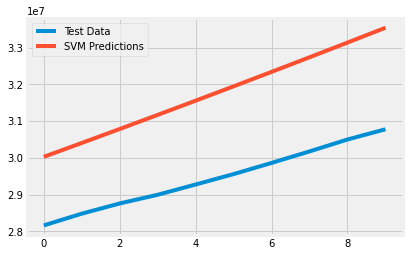

In [14]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [15]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 876645.4257419467
MSE: 906229365620.9631


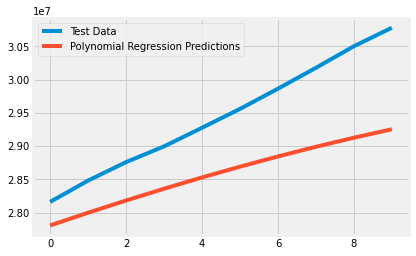

In [16]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [17]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)
bayesian_search.best_params_
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s


MAE: 628157.9703976952
MSE: 405057405263.20593


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.8s finished


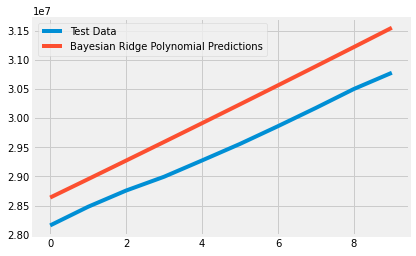

In [18]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [19]:
def country_plot(x, y1, y2, y3, y4, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Iniciando desde el dia 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Iniciando desde el dia 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Iniciando desde el dia 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Iniciando desde el dia 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
        country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths, country_recoveries)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    country_recoveries = country_info[2]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_daily_recovery, country_name)
    

In [20]:
countries = ['Albania',
'Algeria',
'Andorra',
'Angola',
'Antigua and Barbuda',
'Argentina',
'Armenia',
'Australia',
'Austria',
'Azerbaijan',
'Bahamas',
'Bahrain',
'Bangladesh',
'Barbados',
'Belarus',
'Belgium',
'Belize',
'Benin',
'Bhutan',
'Bolivia',
'Bosnia and Herzegovina',
'Botswana',
'Brazil',
'Brunei',
'Bulgaria',
'Burkina Faso',
'Burma',
'Burundi',
'Cabo Verde',
'Cambodia',
'Cameroon',
'Canada',
'Central African Republic',
'Chad',
'Chile',
'Colombia',
'Comoros',
'Congo (Brazzaville)',
'Congo (Kinshasa)',
'Costa Rica',
'Croatia',
'Cuba',
'Cyprus',
'Czechia',
'Denmark',
'Diamond Princess',
'Djibouti',
'Dominica',
'Dominican Republic',
'Ecuador',
'Egypt',
'El Salvador',
'Equatorial Guinea',
'Eritrea',
'Estonia',
'Eswatini',
'Ethiopia',
'Fiji',
'Finland',
'France',
'Gabon',
'Gambia',
'Georgia',
'Germany',
'Ghana',
'Greece',
'Grenada',
'Guatemala',
'Guinea',
'Guinea-Bissau',
'Guyana',
'Haiti',
'Holy See',
'Honduras',
'Hungary',
'Iceland',
'India',
'Indonesia',
'Iran',
'Iraq',
'Ireland',
'Israel',
'Italy',
'Jamaica',
'Japan',
'Jordan',
'Kazakhstan',
'Kenya',
'Korea, South',
'Kosovo',
'Kuwait',
'Kyrgyzstan',
'Laos',
'Latvia',
'Lebanon',
'Lesotho',
'Liberia',
'Libya',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'MS Zaandam',
'Madagascar',
'Malawi',
'Malaysia',
'Maldives',
'Mali',
'Malta',
'Mauritania',
'Mauritius',
'Mexico',
'Moldova',
'Monaco',
'Mongolia',
'Montenegro',
'Morocco',
'Mozambique',
'Namibia',
'Nepal',
'Netherlands',
'New Zealand',
'Nicaragua',
'Niger',
'Nigeria',
'North Macedonia',
'Norway',
'Oman',
'Pakistan',
'Panama',
'Papua New Guinea',
'Paraguay',
'Peru',
'Philippines',
'Poland',
'Portugal',
'Qatar',
'Romania',
'Russia',
'Rwanda',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and the Grenadines',
'San Marino',
'Sao Tome and Principe',
'Saudi Arabia',
'Senegal',
'Serbia',
'Seychelles',
'Sierra Leone',
'Singapore',
'Slovakia',
'Slovenia',
'Somalia',
'South Africa',
'South Sudan',
'Spain',
'Sri Lanka',
'Sudan',
'Suriname',
'Sweden',
'Switzerland',
'Syria',
'Taiwan*',
'Tajikistan',
'Tanzania',
'Thailand',
'Timor-Leste',
'Togo',
'Trinidad and Tobago',
'Tunisia',
'Turkey',
'US',
'Uganda',
'Ukraine',
'United Arab Emirates',
'United Kingdom',
'Uruguay',
'Uzbekistan',
'Venezuela',
'Vietnam',
'West Bank and Gaza',
'Western Sahara',
'Yemen',
'Zambia',
'Zimbabwe',
] 


In [21]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('COVID-19', size=30)
    plt.xlabel('Iniciando desde el dia 1/22/2020', size=30)
    plt.ylabel('Cantidad de Casos', size=30)
    plt.legend(['Casos Confirmados', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

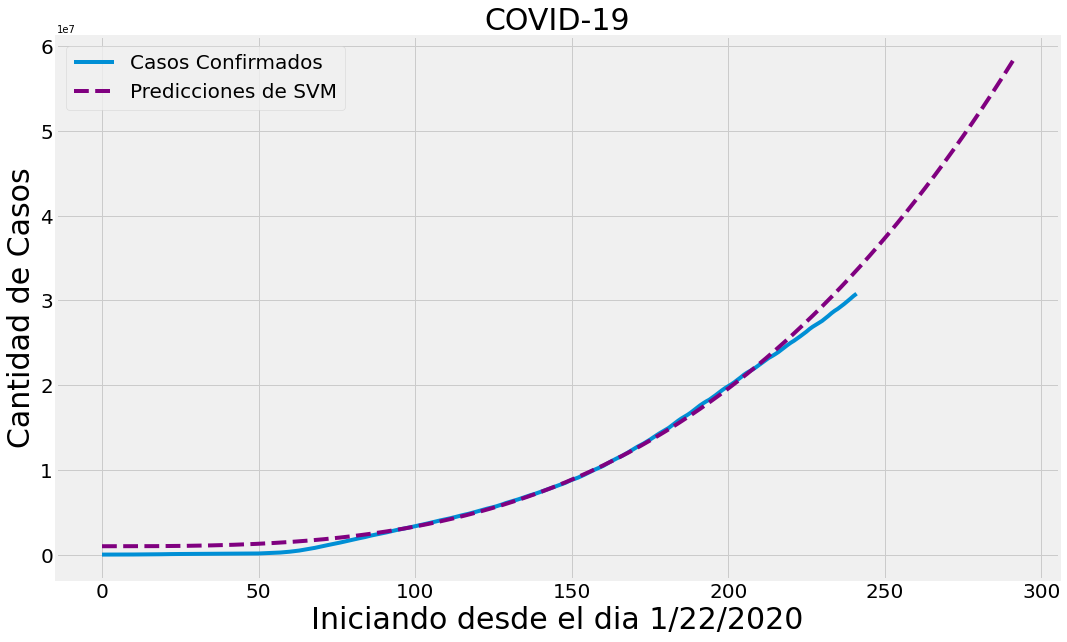

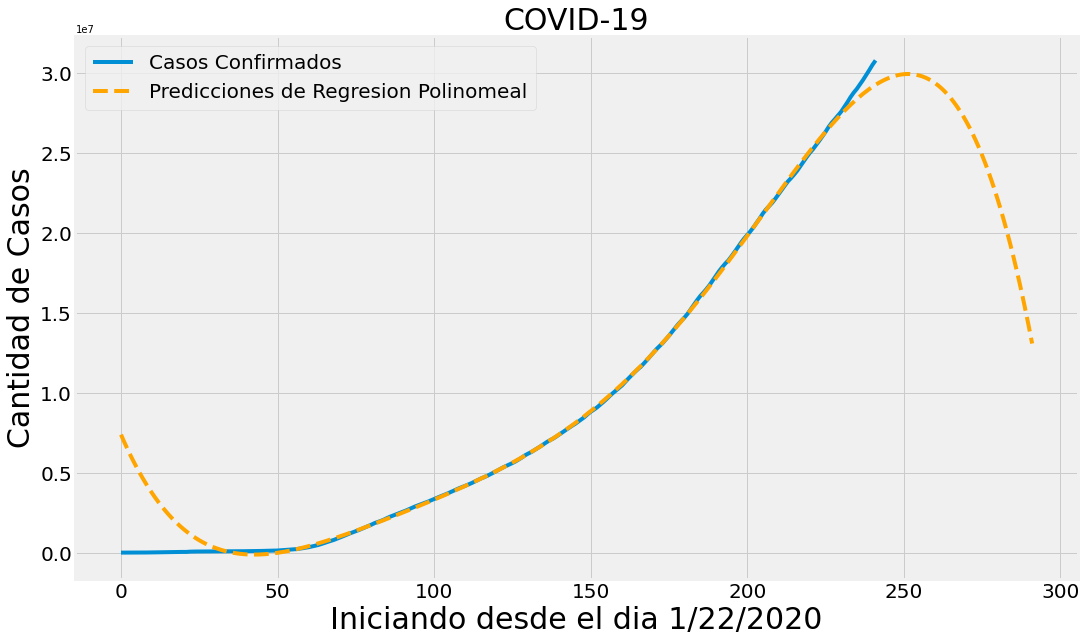

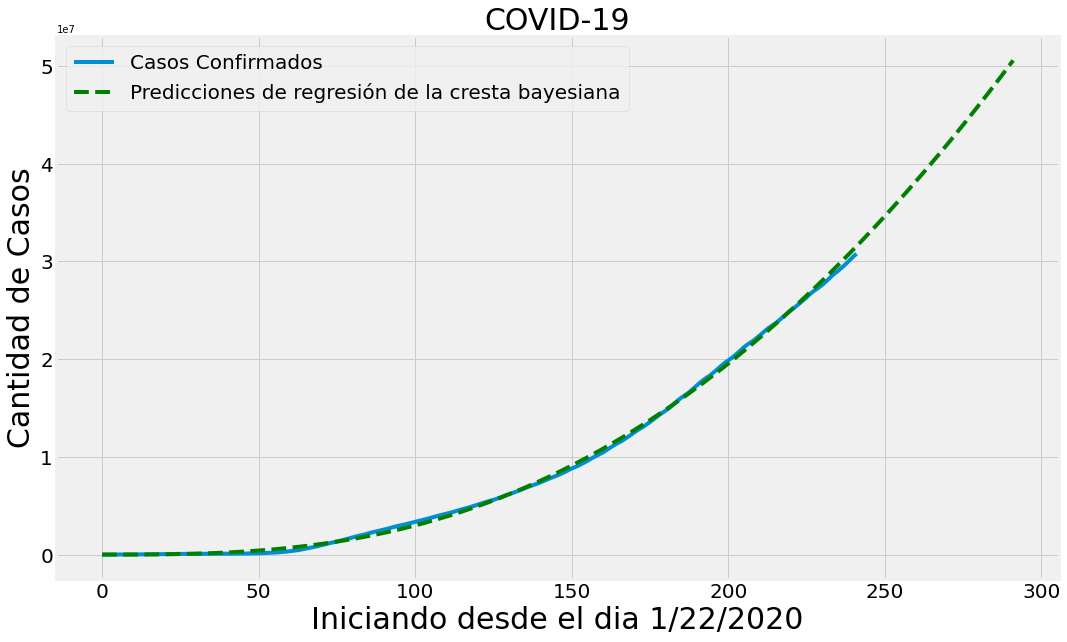

In [22]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'Predicciones de SVM', 'purple')
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Predicciones de Regresion Polinomeal', 'orange')
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Predicciones de regresión de la cresta bayesiana', 'green')

In [23]:
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_1_22[50:], total_deaths[50:], test_size=0.05, shuffle=False)

MAE: 143862.5132421435
MSE: 20981103780.47888


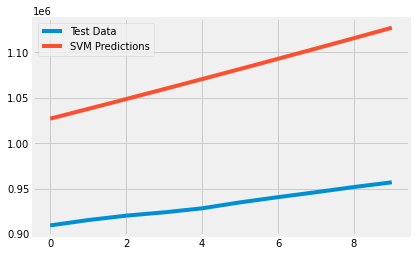

In [24]:
svm_death = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_death.fit(X_train_death, y_train_death)
svm_pred_death = svm_death.predict(future_forcast)
svm_test_pred_death = svm_death.predict(X_test_death)
plt.plot(y_test_death)
plt.plot(svm_test_pred_death)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred_death, y_test_death))
print('MSE:',mean_squared_error(svm_test_pred_death, y_test_death))

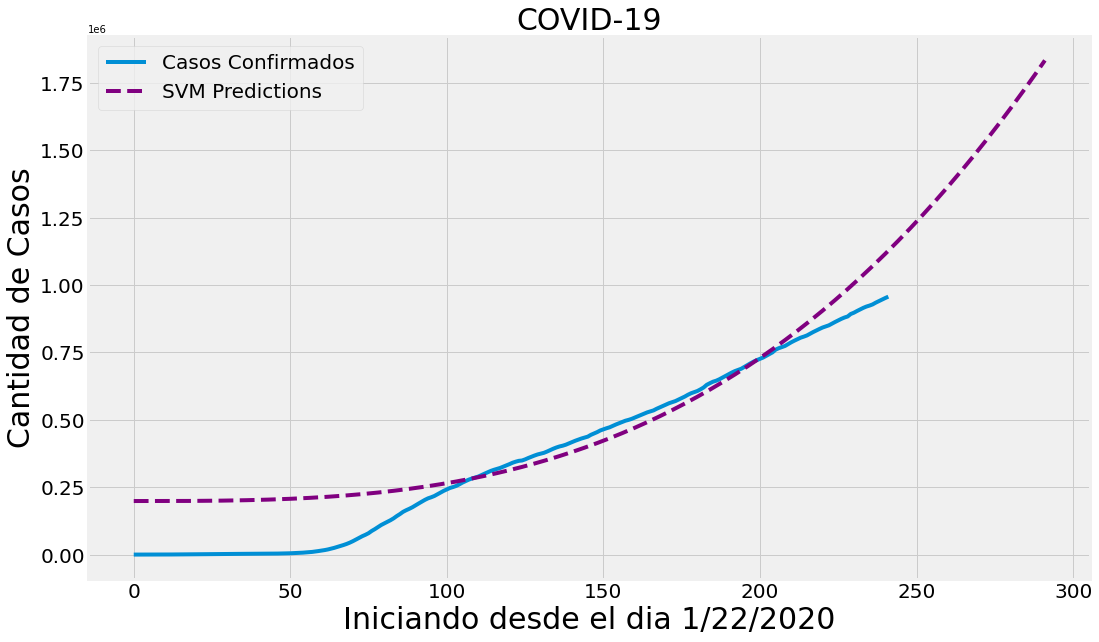

In [25]:
plot_predictions(adjusted_dates, total_deaths, svm_pred_death, 'SVM Predictions', 'purple')

In [26]:
poly = PolynomialFeatures(degree=5)
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_death = bayesian_poly.fit_transform(X_train_death)
bayesian_poly_X_test_death = bayesian_poly.fit_transform(X_test_death)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_death, y_train_death)
test_linear_pred = linear_model.predict(poly_X_test_death)
linear_pred_death = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(test_linear_pred, y_test_death))

MAE: 35236.20341541544
MSE: 1424553671.2970257


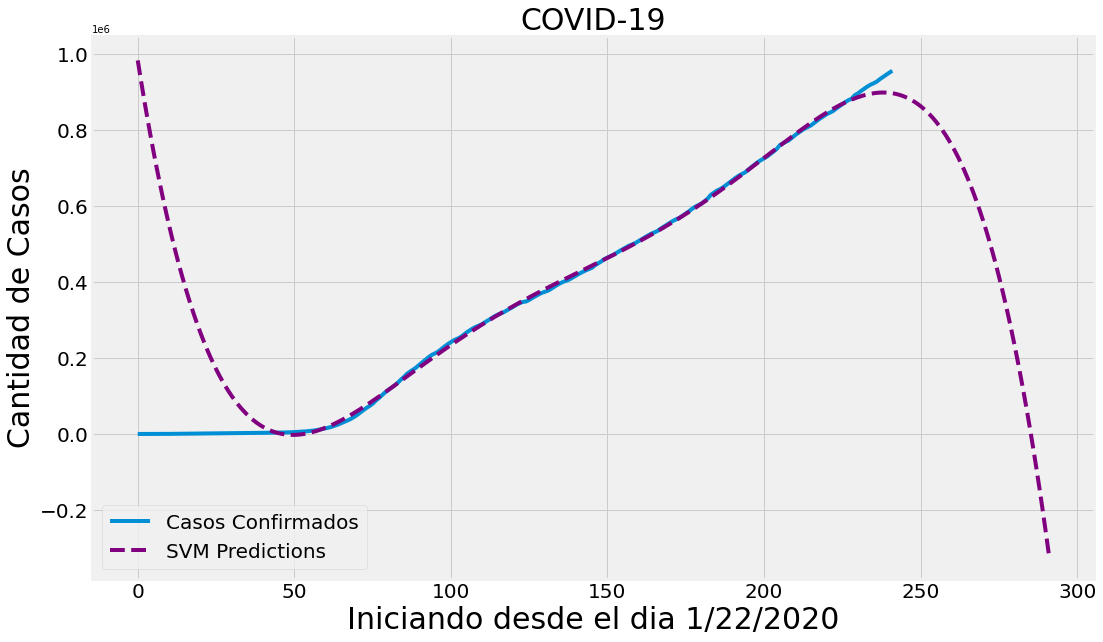

In [27]:
plot_predictions(adjusted_dates, total_deaths, linear_pred_death, 'SVM Predictions', 'purple')

In [28]:
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_death, y_train_death)
bayesian_search.best_params_
bayesian_death = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_death.predict(bayesian_poly_X_test_death)
bayesian_pred = bayesian_death.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_death))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_death))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


MAE: 32016.49170563659
MSE: 1132346878.295969


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished


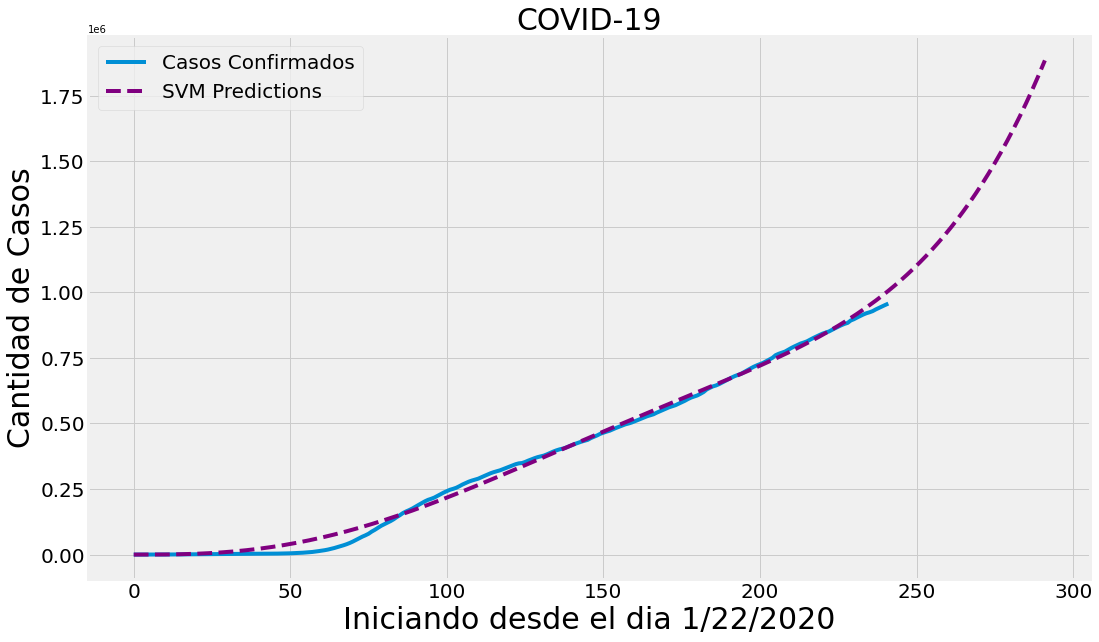

In [29]:
plot_predictions(adjusted_dates, total_deaths, bayesian_pred, 'SVM Predictions', 'purple')

In [30]:
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22[50:], total_recovered[50:], test_size=0.05, shuffle=False)

In [31]:
poly = PolynomialFeatures(degree=5)
poly_X_train_recovered = poly.fit_transform(X_train_recovered)
poly_X_test_recovered = poly.fit_transform(X_test_recovered)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_recovered = bayesian_poly.fit_transform(X_train_recovered)
bayesian_poly_X_test_recovered = bayesian_poly.fit_transform(X_test_recovered)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_recovered, y_train_recovered)
test_linear_pred = linear_model.predict(poly_X_test_recovered)
linear_pred_recovered = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_pred, y_test_recovered))

tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_recovered, y_train_recovered)
bayesian_search.best_params_
bayesian_recovered = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_recovered.predict(bayesian_poly_X_test_recovered)
bayesian_pred = bayesian_recovered.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_recovered))

MAE: 134846.36072867512
MSE: 27616832359.51952
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.6s finished


MAE: 486190.013436719
MSE: 247034104280.80215


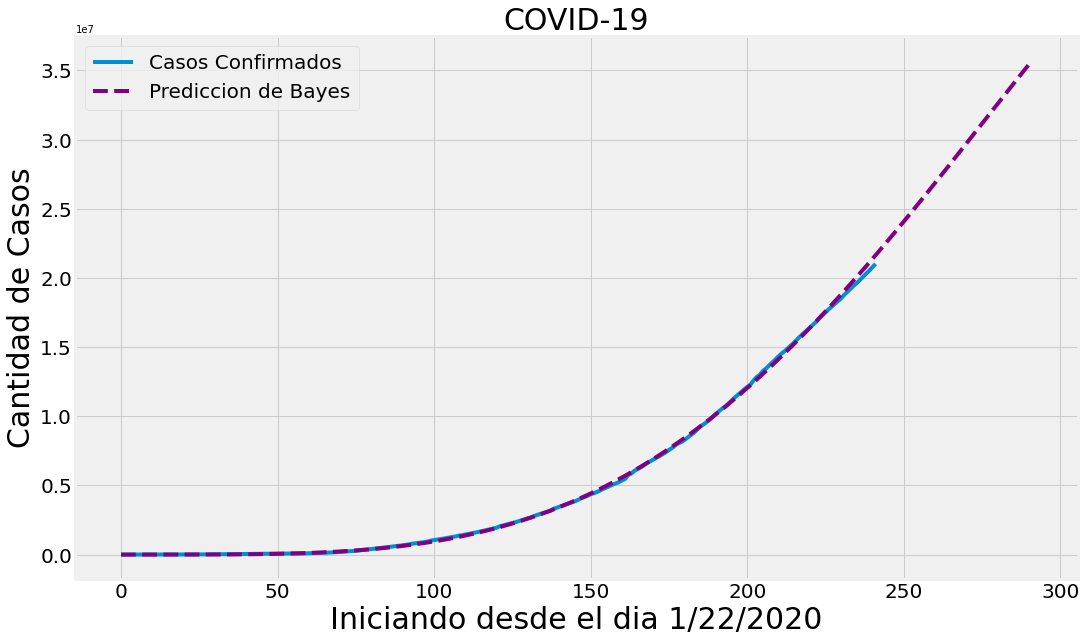

In [32]:
plot_predictions(adjusted_dates, total_recovered, bayesian_pred, 'Prediccion de Bayes', 'purple')

In [33]:
confirmed_df 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,28664,29256,29906,30574,31362,32250,33006,33843,34401,35003
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2003,2007,2009,2011,2013,2016,2019,2022,2024,2026
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13214,13323,13466,13539,13720,13819,13887,13928,14022,14070


In [34]:
confirmado_por_pais =  confirmed_df['Country/Region']=='Guatemala'
confirmado_por_pais = confirmed_df[confirmado_por_pais]
confirmado_por_pais

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
134,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,80306,81009,81658,81909,82172,82684,82924,83664,84344,85152


In [35]:
muertos_por_pais =  deaths_df['Country/Region']=='Guatemala'
muertos_por_pais = deaths_df[muertos_por_pais]
muertos_por_pais

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
134,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,2918,2929,2949,2957,2972,2984,3009,3036,3076,3105


In [36]:
recuperados_por_pais =  recoveries_df['Country/Region']=='Guatemala'
recuperados_por_pais = recoveries_df[recuperados_por_pais]
recuperados_por_pais

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
121,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,68927,69703,70403,70927,71352,71983,72562,73260,73748,74497


In [37]:
cols = confirmado_por_pais.keys()
confirmed = confirmado_por_pais.loc[:, cols[4]:cols[-1]]
deaths = muertos_por_pais.loc[:, cols[4]:cols[-1]]
recoveries = recuperados_por_pais.loc[:, cols[4]:cols[-1]]

In [38]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

window = 7

world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)

world_active_avg = moving_average(total_active, window)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
days_in_future = 50
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-50]

MAE: 10579.661971562153
MSE: 116937874.735564


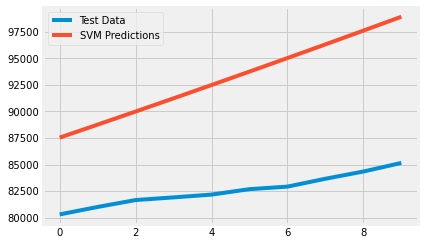

In [39]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.05, shuffle=False)
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

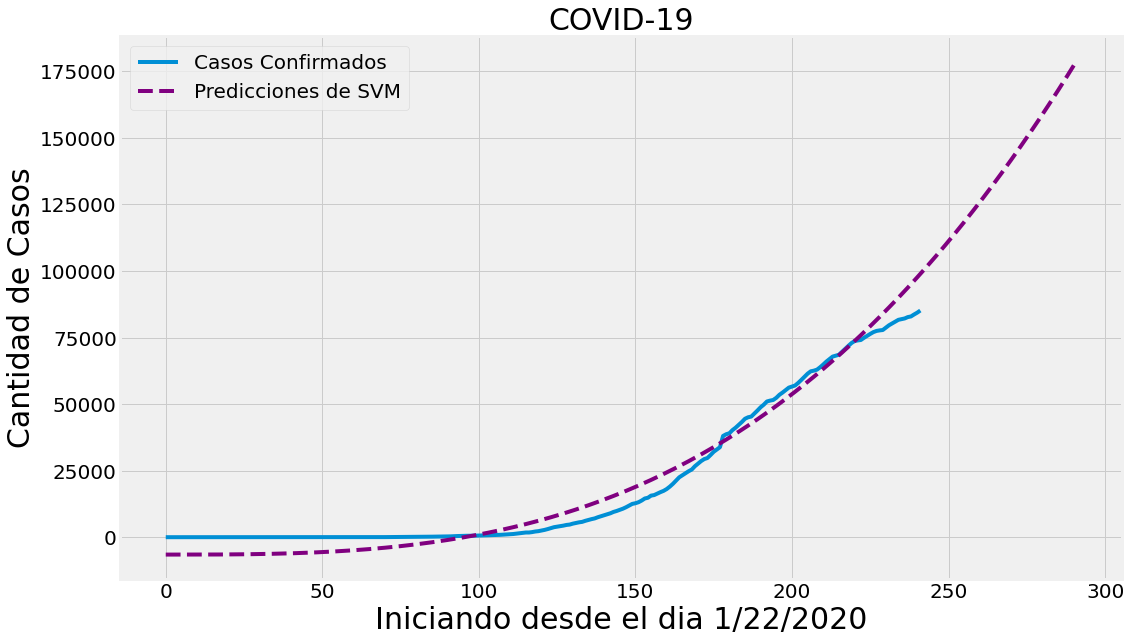

In [40]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'Predicciones de SVM', 'purple')

MAE: 5403.345018966589
MSE: 33400469.22284212
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished


MAE: 2884.8404203241926
MSE: 9973249.51160867


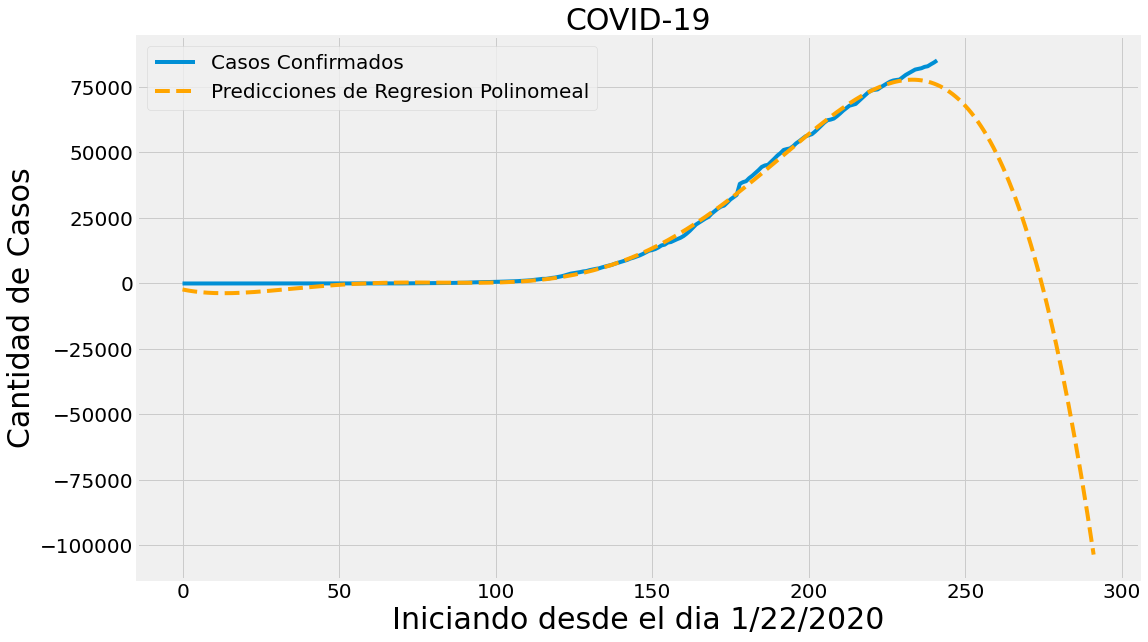

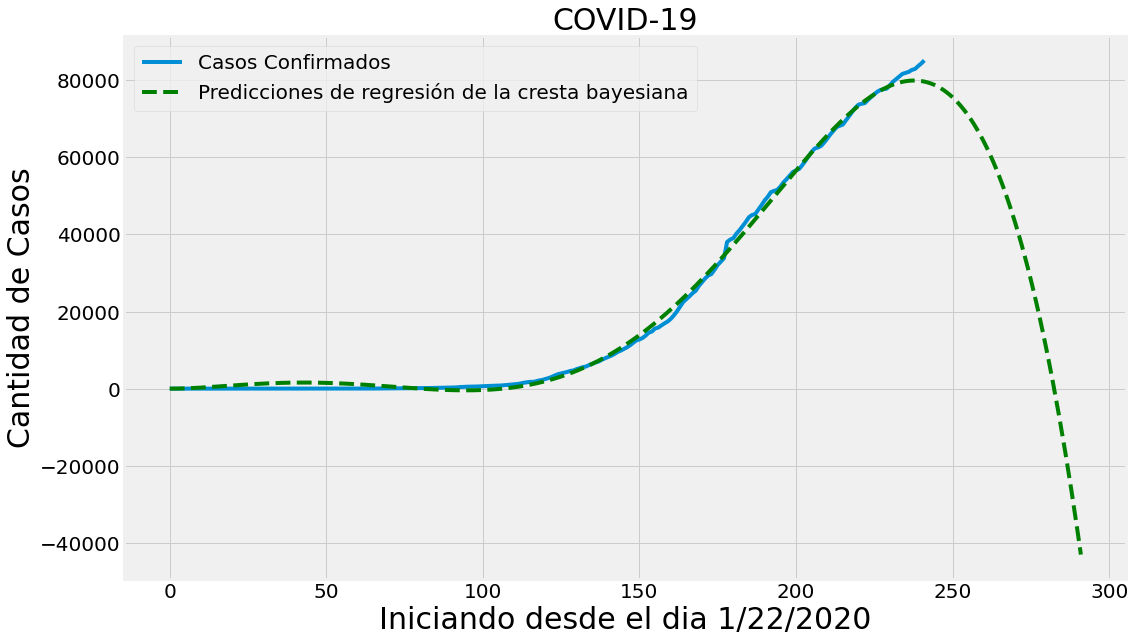

In [41]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)
bayesian_search.best_params_
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))


plot_predictions(adjusted_dates, world_cases, linear_pred, 'Predicciones de Regresion Polinomeal', 'orange')
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Predicciones de regresión de la cresta bayesiana', 'green')

MAE: 522.4507111991231
MSE: 279269.3190747312
MAE: 206.1081122152027
MSE: 51866.99444779614
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


MAE: 208.4097679409737
MSE: 53536.66600780529


[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.4s finished


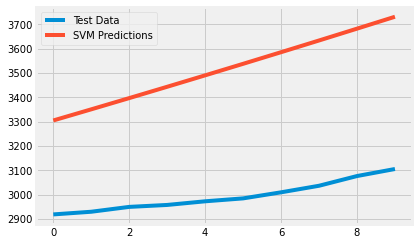

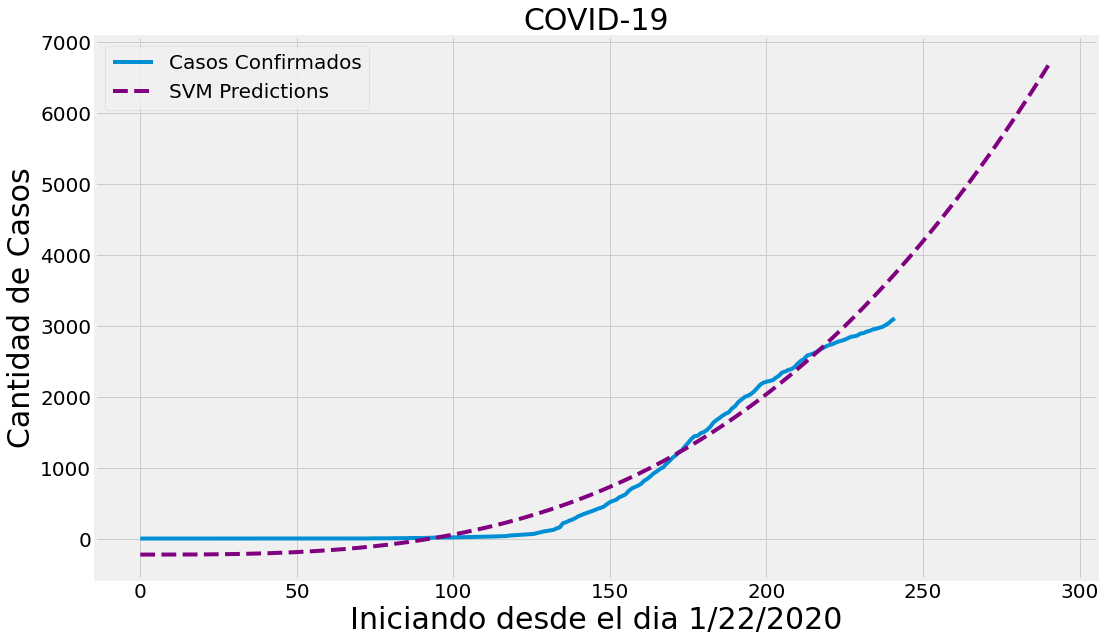

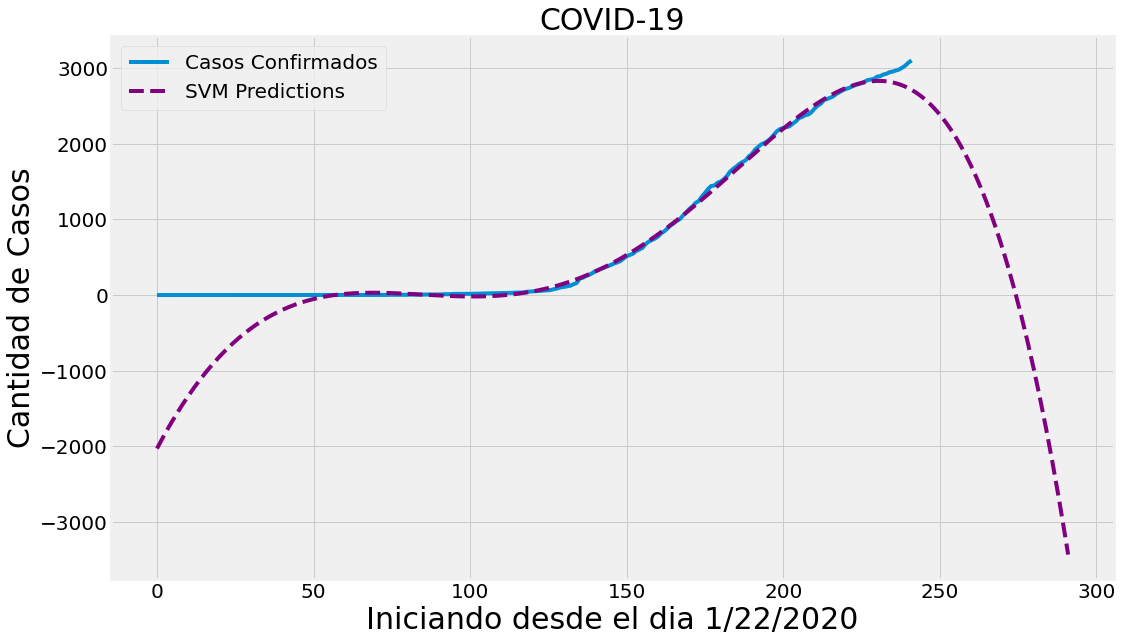

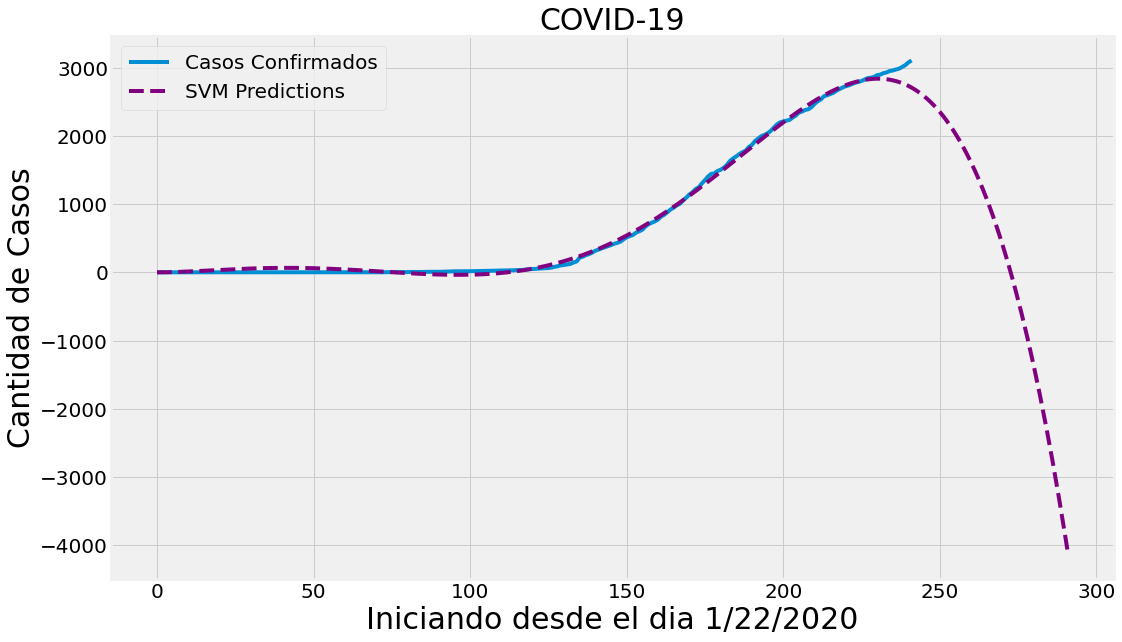

In [42]:
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_1_22[50:], total_deaths[50:], test_size=0.05, shuffle=False)
svm_death = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_death.fit(X_train_death, y_train_death)
svm_pred_death = svm_death.predict(future_forcast)
svm_test_pred_death = svm_death.predict(X_test_death)
plt.plot(y_test_death)
plt.plot(svm_test_pred_death)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred_death, y_test_death))
print('MSE:',mean_squared_error(svm_test_pred_death, y_test_death))

poly = PolynomialFeatures(degree=5)
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_death = bayesian_poly.fit_transform(X_train_death)
bayesian_poly_X_test_death = bayesian_poly.fit_transform(X_test_death)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_death, y_train_death)
test_linear_pred = linear_model.predict(poly_X_test_death)
linear_pred_death = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(test_linear_pred, y_test_death))

tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_death, y_train_death)
bayesian_search.best_params_
bayesian_death = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_death.predict(bayesian_poly_X_test_death)
bayesian_pred = bayesian_death.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_death))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_death))

plot_predictions(adjusted_dates, total_deaths, svm_pred_death, 'SVM Predictions', 'purple')
plot_predictions(adjusted_dates, total_deaths, linear_pred_death, 'SVM Predictions', 'purple')
plot_predictions(adjusted_dates, total_deaths, bayesian_pred, 'SVM Predictions', 'purple')

MAE: 13082.146623735875
MSE: 200019444.97337648
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.9s finished


MAE: 12562.953809726454
MSE: 164252416.99297947


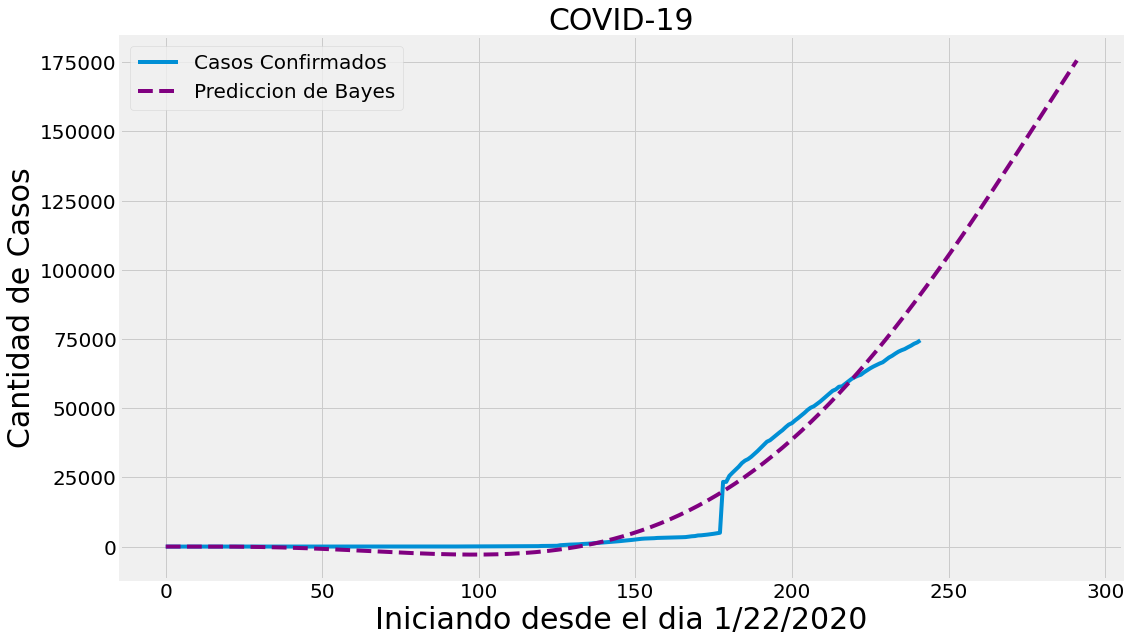

In [43]:
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22[50:], total_recovered[50:], test_size=0.05, shuffle=False)
poly = PolynomialFeatures(degree=5)
poly_X_train_recovered = poly.fit_transform(X_train_recovered)
poly_X_test_recovered = poly.fit_transform(X_test_recovered)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_recovered = bayesian_poly.fit_transform(X_train_recovered)
bayesian_poly_X_test_recovered = bayesian_poly.fit_transform(X_test_recovered)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_recovered, y_train_recovered)
test_linear_pred = linear_model.predict(poly_X_test_recovered)
linear_pred_recovered = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_pred, y_test_recovered))

tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_recovered, y_train_recovered)
bayesian_search.best_params_
bayesian_recovered = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_recovered.predict(bayesian_poly_X_test_recovered)
bayesian_pred = bayesian_recovered.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_recovered))
plot_predictions(adjusted_dates, total_recovered, bayesian_pred, 'Prediccion de Bayes', 'purple')

In [44]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/10/20', '9/11/20', '9/12/20', '9/13/20', '9/14/20', '9/15/20',
       '9/16/20', '9/17/20', '9/18/20', '9/19/20'],
      dtype='object', length=242)